<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Imad/Charlotte311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://www.commonapp.org/static/90a1fb37e395b1adc32f28236052d416/university-north-carolina-charlotte_959.jpg'>



## PROJECT: Charlotte 311 Service Requests
## DSBA 6162


**Charlotte 311 Calls** has been dowloaded from the [Charlotte Open Data portal](https://data.charlottenc.gov/datasets/service-requests-311/explore)

In this notebook, I will be importing the above data and GIS map data from my Google Drive. **GIS and Census data** come from the [Census Reporter](https://censusreporter.org/) website.

**Other data and GIS resources:**


1.   [Open Maps](http://maps.co.mecklenburg.nc.us/openmapping/data.html)
2.   [Census Blocks](https://www.census.gov/newsroom/blogs/random-samplings/2011/07/what-are-census-blocks.html)
3. [Geopandas in CoLab](https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=6pMKuuyNMnwv)
4. [Medium Article](https://ecyy.medium.com/mapping-gis-data-on-a-basemap-by-contextily-in-colab-dfff5837eec): Using GIS data in python
5. [UCLA Workshop on GeoPandas](https://github.com/yohman/getting-started-with-gis)








In [3]:
# Import Numpy
import numpy as np

# Import Pandas
import pandas as pd

# Import Random
import random

# to read and visualize spatial data
# ! pip install geopandas
import geopandas as gpd

# ! pip install contextily
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# Import Seaborn for plotting
import seaborn as sns

plt.style.use('ggplot')


     |████████████████████████████████| 19.3 MB 1.2 MB/s 


### 1) Importing the data file from Google drive.

In [4]:
# Import Data

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/Service_Requests_311.csv')


### 2) Taking a look at the our data

In [6]:
# Taking a look at the data
df.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [7]:
# More exploration
# Lets take a look at how each variable is stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION               45672 non-null    object 
 1

In [8]:
# Lets check the Value Counts for 311 Requests
df['REQUEST_TYPE'].value_counts().head(30).sort_values(ascending=False)

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       6956
STREET SWEEPING/FLUSHING       6824
GRAFFITI                    

In [9]:
# Checking the full list of Request Types
df['REQUEST_TYPE'].unique().tolist()

['NON_RECYCLABLE ITEMS',
 'UTILITY VERIFICATION LTR',
 'MISSED RECYCLING',
 'CITIZEN FEEDBACK',
 'CWP REQUEST',
 'RECYCLABLE ITEMS',
 'CART REPAIR-GARBAGE',
 '311 DOCUMENT',
 'HNS HEALTH AND SANITATION',
 'ZON DAYCARE/CHILDCARE INQ',
 'CDOT STREETLIGHT REPAIR',
 'ZON SIGNS INQUIRY',
 'CART ISSUE/MISSING CART',
 'CART(S) DEL- NEW BUILD',
 'CART REPAIR-RECYCLE',
 'CDOT STREET SIGN REP/REPL',
 'SW DOCUMENT BULKY ITEMS',
 'TIRES',
 'LANDSCAPE TREES',
 'CART DELIVERY RECYCLING',
 'TAX BILL INQUIRY',
 'CART PURCHASE 2ND-GARBAGE',
 'FIELD OBSERVED PROBLEM',
 'SW DOCUMENT YARD WASTE',
 'LITTER/DEBRIS IN STREET',
 'SWS CART SHIPMT REVIEW',
 'ZONGROUP/BOARDING HOMES',
 'INVALID/NEW SW ADDRESS',
 'FLOODING',
 'SW DOCUMENT GARBAGE',
 'DEAD ANIMAL COLLECTION',
 'SW DOCUMENT RECYCLING',
 'ZON RESIDENTIAL PERMITS',
 'INVESTIGATE/CONTACT RECY',
 'HNS HOUSING',
 'CART ONLY DELIVER-GARB',
 'CART PURCHASE 2ND-RECYCLE',
 'CDOT TRAF SIGNAL TIMING',
 'CART PICKUP-RECYCLE',
 '3-1-1 ESCALATION REQUEST',
 'CDO

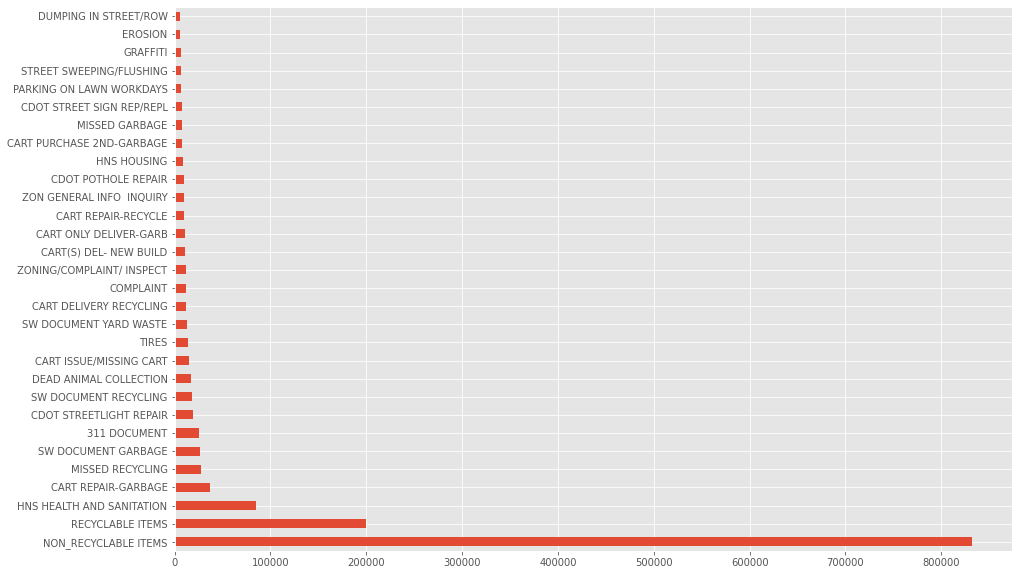

In [10]:
# Create barplot of the top 30 Request types
df['REQUEST_TYPE'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

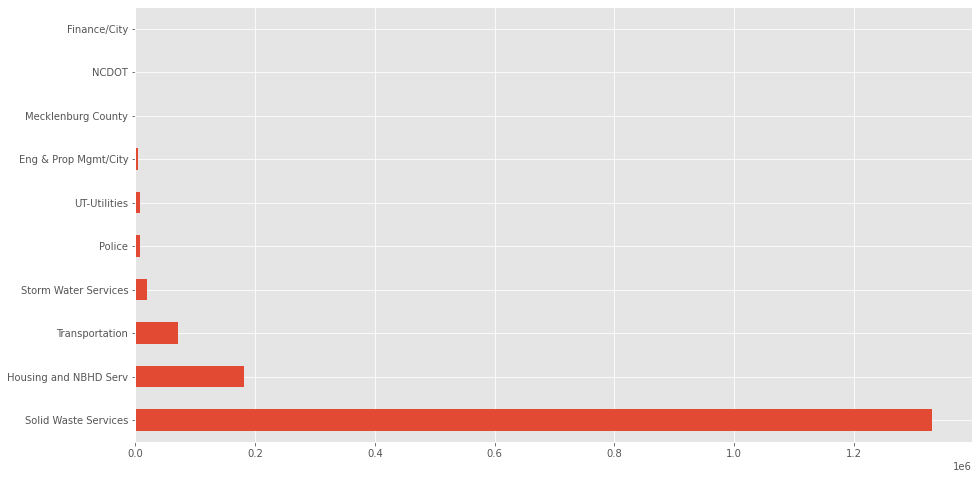

In [11]:
# create barplot of the departments involved in 'Request types'
df['DEPARTMENT'].value_counts().head(10).plot(kind='barh', figsize=(15,8))

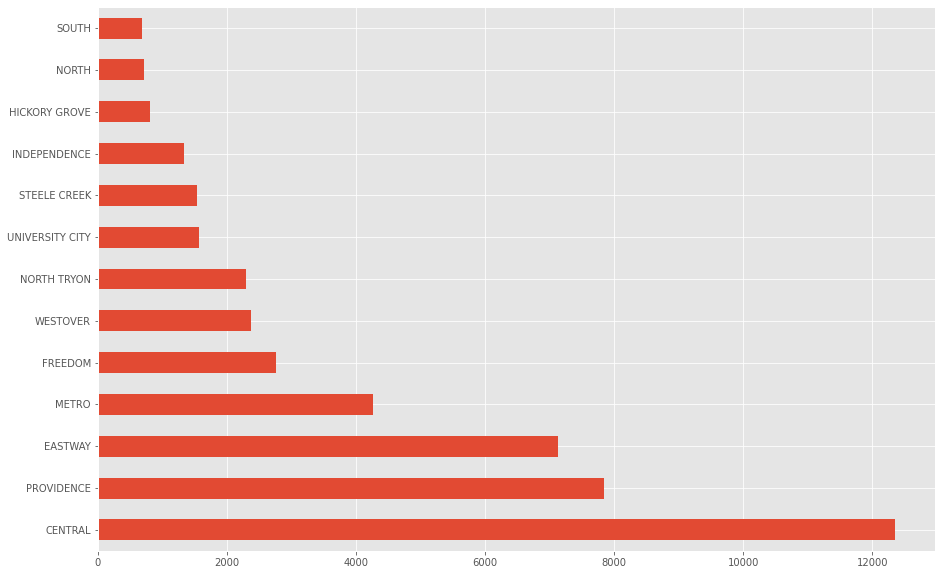

In [12]:
# Barplot of CMPD divisions in relation to request types
df['CMPD_DIVISION'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

In [14]:
# load the census GIS file

gdf_race = gpd.read_file('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/cencus_race/acs2019_5yr_B02001_14000US37119005812.geojson')

In [15]:
# get number of rows, columns
gdf_race.shape



(234, 23)

In [16]:
# get first 5 rows
gdf_race.head()



,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",B02001005,"B02001005, Error",B02001006,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,05000US37119,"Mecklenburg County, NC",1074475.0,0.0,577943.0,2426.0,339021.0,1600.0,4166.0,755.0,62922.0,821.0,554.0,122.0,60010.0,2449.0,29859.0,1863.0,2467.0,415.0,27392.0,1815.0,"MULTIPOLYGON (((-80.75291 35.41560, -80.75241 ..."
1,14000US37119000100,"Census Tract 1, Mecklenburg, NC",5897.0,518.0,4417.0,523.0,602.0,239.0,82.0,110.0,366.0,163.0,18.0,28.0,166.0,143.0,246.0,111.0,59.0,54.0,187.0,117.0,"MULTIPOLYGON (((-80.85519 35.22279, -80.85444 ..."
2,14000US37119000300,"Census Tract 3, Mecklenburg, NC",1115.0,130.0,770.0,130.0,319.0,102.0,0.0,12.0,10.0,15.0,0.0,12.0,5.0,9.0,11.0,13.0,0.0,12.0,11.0,13.0,"MULTIPOLYGON (((-80.84890 35.21865, -80.84880 ..."
3,14000US37119000400,"Census Tract 4, Mecklenburg, NC",3490.0,305.0,2802.0,291.0,465.0,137.0,0.0,12.0,124.0,64.0,0.0,12.0,9.0,14.0,90.0,61.0,0.0,12.0,90.0,61.0,"MULTIPOLYGON (((-80.86698 35.22303, -80.86683 ..."
4,14000US37119000500,"Census Tract 5, Mecklenburg, NC",5438.0,568.0,3400.0,501.0,1656.0,301.0,2.0,6.0,64.0,58.0,0.0,17.0,14.0,23.0,302.0,222.0,0.0,17.0,302.0,222.0,"MULTIPOLYGON (((-80.86034 35.22919, -80.86028 ..."


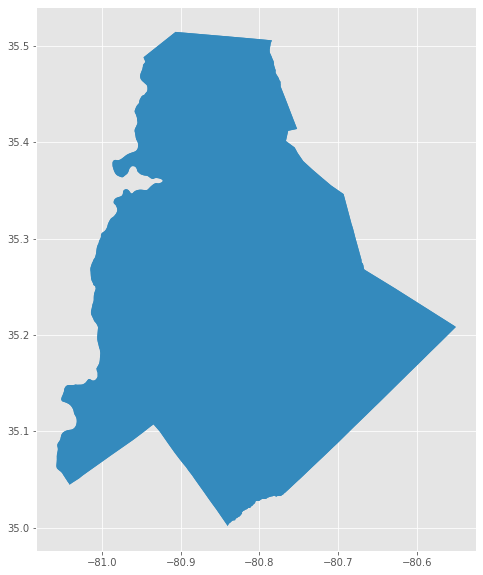

In [17]:
# plot it!
gdf_race.plot(figsize=(10,10))



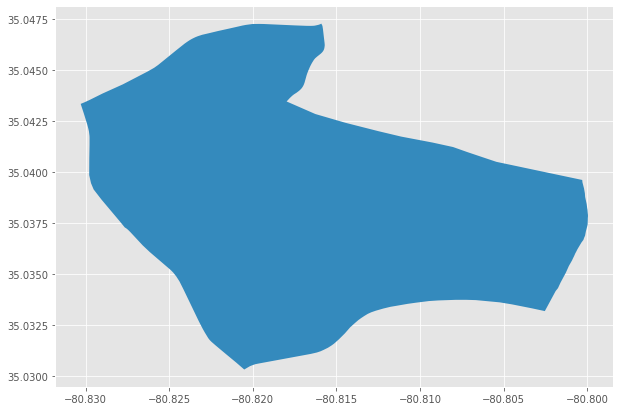

In [20]:
# Random plot of one sample row - keep clicking play to produce another random plot
gdf_race.sample().plot(figsize=(10,10))

**GEOID: Is basically a FIPS code**

    [FIPS](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html)

<br> Ignore 14000 US - it just means the type of Census Data</br>
<br>**The first 2 digits** = State = 37 For NC</br>
<br>**The next 3 digits** = County = 119 for Mecklenburg County</br>
<br>**The next 6 digits** = Tract - which can be further divided into "Block Groups" - and those are divided into "Blocks"</br>
<br>T**he last digit** = Block Number</br>


In [21]:
gdf_race.geoid.head()

0          05000US37119
1    14000US37119000100
2    14000US37119000300
3    14000US37119000400
4    14000US37119000500
Name: geoid, dtype: object

**Clean the data:**
1. Remove the first row (which is a summary row)
2. Check the data dictionary and keep only the columns we are interested in

Keep:
1. B02001001 = Total Population
2. B02001002  = White population statistics
3. B02001003 = African American population statistics
4. B02001005 = Asian population Statistics

There was not a hispanic column.

In [23]:
# drop the row with index 0 (i.e. the first row)
gdf_race = gdf_race.drop([0])

In [24]:
# list all of the column names
list(gdf_race)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

In [32]:
# create a list of columns to keep
columns_to_keep = ['geoid',
 'name',
 'B02001001'
 'B02001002',
 'B02001003',
 'B02001005',
 'geometry']

In [33]:
# redefine gdf with only columns to keep
gdf_race = gdf_race[columns_to_keep]

KeyError: ignored

In [27]:
# double checking to see if the removal of columns worked
gdf_race.head()

,geoid,name,B02001002,B02001003,B02001005,geometry
1,14000US37119000100,"Census Tract 1, Mecklenburg, NC",4417.0,602.0,366.0,"MULTIPOLYGON (((-80.85519 35.22279, -80.85444 ..."
2,14000US37119000300,"Census Tract 3, Mecklenburg, NC",770.0,319.0,10.0,"MULTIPOLYGON (((-80.84890 35.21865, -80.84880 ..."
3,14000US37119000400,"Census Tract 4, Mecklenburg, NC",2802.0,465.0,124.0,"MULTIPOLYGON (((-80.86698 35.22303, -80.86683 ..."
4,14000US37119000500,"Census Tract 5, Mecklenburg, NC",3400.0,1656.0,64.0,"MULTIPOLYGON (((-80.86034 35.22919, -80.86028 ..."
5,14000US37119000600,"Census Tract 6, Mecklenburg, NC",1384.0,1230.0,160.0,"MULTIPOLYGON (((-80.83921 35.22210, -80.83811 ..."


In [29]:
list(gdf_race)

['geoid', 'name', 'B02001002', 'B02001003', 'B02001005', 'geometry']

In [30]:
# Rename the columns

gdf_race.columns = ['geoid',
 'name',
 'White',
 'African American',
 'Asian',
 'geometry']

In [31]:
gdf_race.head()

,geoid,name,White,African American,Asian,geometry
1,14000US37119000100,"Census Tract 1, Mecklenburg, NC",4417.0,602.0,366.0,"MULTIPOLYGON (((-80.85519 35.22279, -80.85444 ..."
2,14000US37119000300,"Census Tract 3, Mecklenburg, NC",770.0,319.0,10.0,"MULTIPOLYGON (((-80.84890 35.21865, -80.84880 ..."
3,14000US37119000400,"Census Tract 4, Mecklenburg, NC",2802.0,465.0,124.0,"MULTIPOLYGON (((-80.86698 35.22303, -80.86683 ..."
4,14000US37119000500,"Census Tract 5, Mecklenburg, NC",3400.0,1656.0,64.0,"MULTIPOLYGON (((-80.86034 35.22919, -80.86028 ..."
5,14000US37119000600,"Census Tract 6, Mecklenburg, NC",1384.0,1230.0,160.0,"MULTIPOLYGON (((-80.83921 35.22210, -80.83811 ..."
